In [1]:
from numpy import loadtxt
from keras.layers import Dense
from keras.models import Sequential
from sklearn import datasets
from sklearn.metrics import log_loss

(moon_x,moon_y) = datasets.make_moons(n_samples=10000, noise=0.05, random_state=42)

(circle_x,circle_y) = datasets.make_circles(n_samples=10000, noise=0.025, random_state=42)

In [2]:
#for moon data

#create layers
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) #2 variables, 4 nodes 
model.add(Dense(1, activation='sigmoid'))

- Epoch: a fixed number of iterations. One pass through all of the rows in the training dataset.
- Batch: set the number of dataset rows that are considered before the model weights are updated within each epoch. 

In [3]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(moon_x, moon_y , epochs=50, batch_size=10)
_, accuracy = model.evaluate(moon_x, moon_y)

print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
1000/1000 [==============================] - 3s 2ms/step - loss: 0.4358 - accuracy: 0.8089
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2596 - accuracy: 0.8774
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2258 - accuracy: 0.8900
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2137 - accuracy: 0.8943
Epoch 5/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2074 - accuracy: 0.8949
Epoch 6/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2043 - accuracy: 0.8947
Epoch 7/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2029 - accuracy: 0.8945
Epoch 8/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2020 - accuracy: 0.8952
Epoch 9/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.2018 - accuracy: 0.8950
Epoch 10/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.201

In [18]:
moon_y

array([1, 0, 0, ..., 1, 0, 1])

In [19]:
predictions = model.predict(moon_x)
# round predictions 
rounded_pred = [round(x[0]) for x in predictions]
log_loss(moon_y, rounded_pred)

11.097355232335754

Accuracy for moon data is 89.49%, and the cross entropy is around 11.09.

In [12]:
#for circle data 

model.fit(circle_x, circle_y , epochs=50, batch_size=10)
_, accuracy = model.evaluate(circle_x, circle_y)

print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.9255 - accuracy: 0.5546
Epoch 2/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6427 - accuracy: 0.6050
Epoch 3/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6149 - accuracy: 0.6206
Epoch 4/50
1000/1000 [==============================] - 1s 1ms/step - loss: 0.6002 - accuracy: 0.6254
Epoch 5/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5866 - accuracy: 0.6473
Epoch 6/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5734 - accuracy: 0.7182
Epoch 7/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.5616 - accuracy: 0.7353
Epoch 8/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5525 - accuracy: 0.7400
Epoch 9/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7337
Epoch 10/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.538

In [20]:
predictions_circles = model.predict(circle_x)
# round predictions 
rounded_pred_circles = [round(x[0]) for x in predictions_circles]
log_loss(circle_y, rounded_pred_circles)

5.529731743748522

Accuracy for circle data is 83.99%, and the cross entropy is around 5.529.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

Text(0.5, 1.0, 'Moon classification')

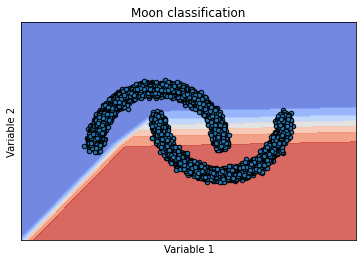

In [11]:

X0, X1 = moon_x[:, 0], moon_x[:, 1]
xx, yy = make_meshgrid(X0, X1) 

fig, ax = plt.subplots()
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Moon classification')

Only one hidden layers, can only turn around 1 time. 

Text(0.5, 1.0, 'Circle classification')

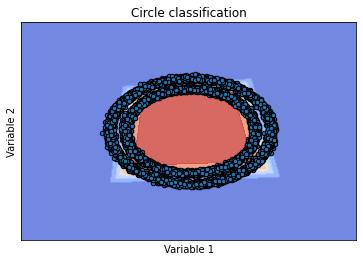

In [13]:
X0, X1 = circle_x[:, 0], circle_x[:, 1]
xx, yy = make_meshgrid(X0, X1) 

fig, ax = plt.subplots()
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel("Variable 1")
ax.set_ylabel("Variable 2")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Circle classification')